# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading the dataset

For demonstration purposes, let us take a 2 dimensional dataset with two features (Feature_1 and Feature_2) and consisting of two classes (Class A and Class B) having a distribution specifications as follows:

**Class A:** The Class A is centred around the mean of (-0.2,-0.2) and has the covariance matrix [[0.05,-0.035],[-0.035,0.05]]

**Class B:** The Class B is centred around the mean of (0.2,0.38) and has the covariance matrix [[0.05,0],[0,0.005]]

Defintions: 

**Mean:** A Class with centre (x1, x2) as mean denotes that the average value along "Feature_1" is x1 and the average value along "Feature_2" is x2

P.S: Since we would like to ensure that the outputs corrosponds to the desired output, we will also add the seed value of 42 while generating these distributions.



In [2]:
mean_01=np.array([-0.2,-0.2])
cov_01=np.array([[0.05,-0.035],[-0.035,0.05]])
mean_02=np.array([0.2,0.38])
cov_02=np.array([[0.05,0],[0,0.005]])
np.random.seed(42)
data_01=np.random.multivariate_normal(mean_01,cov_01,200, check_valid= "warn")
data_02=np.random.multivariate_normal(mean_02,cov_02,200, check_valid= "warn")
data = np.vstack((data_01,data_02))
df_train = pd.DataFrame(data, columns = ["Feature_1", "Feature_2"])
df_train["class"] = [-1]*200 + [1]*200 

# Visualising the dataset

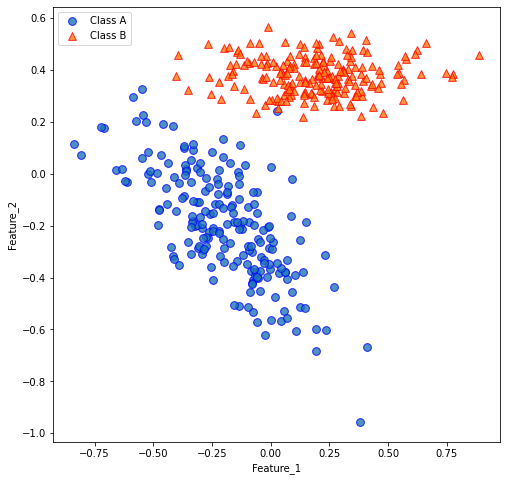

In [3]:
## For Contributing, refer to expectedoutput1.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(df_train["Feature_1"][:200],df_train["Feature_2"][:200], label="Class A", edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(df_train["Feature_1"][200:],df_train["Feature_2"][200:], label="Class B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
plt.legend()
plt.show()

# Machine Learning Model

## Preparing training and test sets

In [4]:
X = df_train[["Feature_1","Feature_2"]].to_numpy()
Y = df_train[["class"]].to_numpy()

## Defining the model

In [5]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
        
    def hinge_loss(self,W,b,X,Y):
        temp=0
        for i in range(X.shape[0]):
            ti=Y[i]*(np.dot(W,X[i]) + b)
            temp+=max(0,1-ti)
        loss=0.5*(np.dot(W.T,W)) + self.C * temp
        return(loss[0][0])
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001):
        n_features,n_examples,n,c=X.shape[1],X.shape[0],learning_rate,self.C
        print(n_examples)
        W=np.zeros((1,n_features))
        b=0
        loss_list=[]
        for i in range(300):
            loss_list.append(self.hinge_loss(W,b,X,Y))
            indices=np.arange(n_examples)
            np.random.shuffle(indices)
            indices=indices[:batch_size]
            gradW,gradb=0,0
            for i in indices:
                ti=Y[i]*(np.dot(W,X[i]) + b)
                if ti>=1:
                    gradW +=0 
                    gradb +=0
                else:
                    gradW += c*(Y[i]*X[i])
                    gradb += c*Y[i]
            W = W - n*W + n*gradW
            b = b + n*gradb
            self.W=W
            self.b=b
        return(W,b,loss_list)

## Low penalty SVM

### Training the model

In [6]:
sv=SVM(0.5)
W,b,loss_list=sv.fit(X, Y)
W=W.reshape((-1,))

400


### Visualising the error 

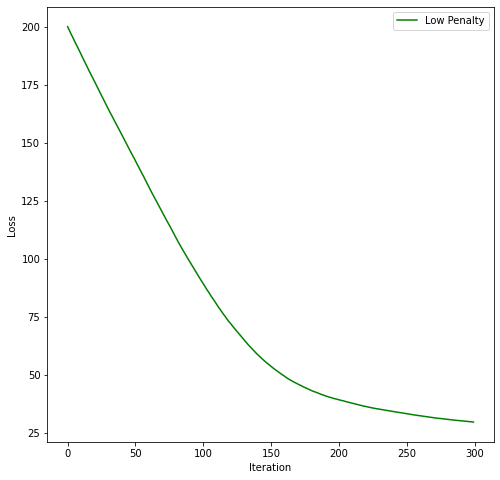

In [7]:
## For Contributing, refer to expectedoutput2.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(loss_list,label="Low Penalty",c='g')
plt.legend()
plt.show()


### Visualising the decision boundry over iterations

In [ ]:
## For Contributing, refer to expectedoutput3.html in the expected outputs folder.


### Plotting the decision boundry

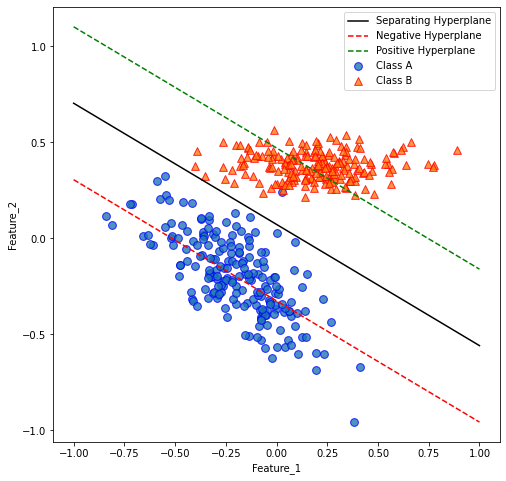

In [8]:
## For Contributing, refer to expectedoutput4.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(df_train["Feature_1"][:200],df_train["Feature_2"][:200], label="Class A", edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(df_train["Feature_1"][200:],df_train["Feature_2"][200:], label="Class B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
xt=np.linspace(-1,1,10)
y= -1 * (b+W[0]*xt)/W[1]
y1= (1-b-W[0]*xt)/W[1]
y2= (-1-b-W[0]*xt)/W[1]
plt.plot(xt,y, c = 'black', label="Separating Hyperplane")
plt.plot(xt,y2,c='r',linestyle="--",label="Negative Hyperplane")
plt.plot(xt,y1,c='g',linestyle="--",label="Positive Hyperplane")
plt.legend()
plt.show()

## Mid penelty SVM

### Training the model

In [9]:
sv=SVM(10)
W,b,loss_list=sv.fit(X, Y)
W=W.reshape((-1,))

400


### Visualising the error 

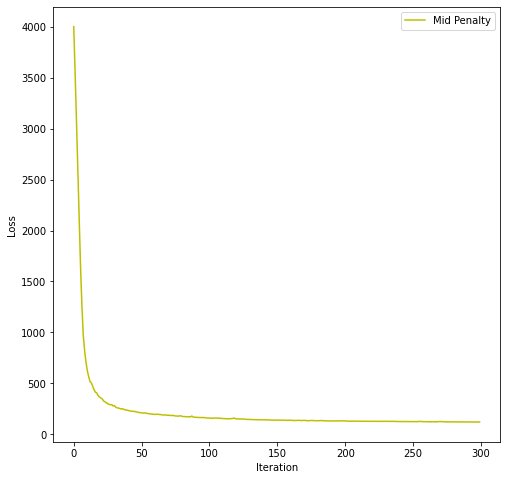

In [10]:
## For Contributing, refer to expectedoutput5.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(loss_list,label="Mid Penalty",c='y')
plt.legend()
plt.show()

### Visualising the decision boundry over iterations

In [ ]:
## For Contributing, refer to expectedoutput6.html in the expected outputs folder.


### Plotting the decision boundry

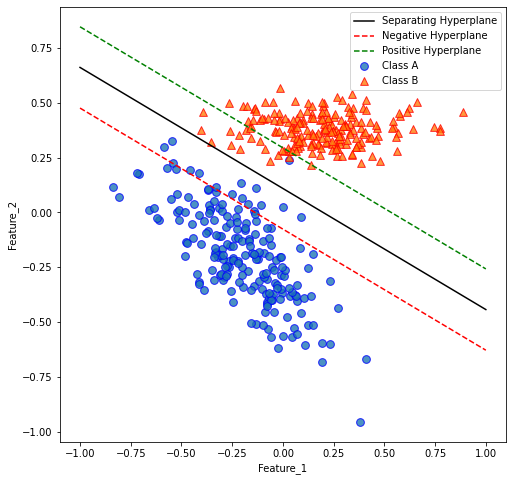

In [11]:
## For Contributing, refer to expectedoutput7.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(df_train["Feature_1"][:200],df_train["Feature_2"][:200], label="Class A", edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(df_train["Feature_1"][200:],df_train["Feature_2"][200:], label="Class B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
xt=np.linspace(-1,1,10)
y= -1 * (b+W[0]*xt)/W[1]
y1= (1-b-W[0]*xt)/W[1]
y2= (-1-b-W[0]*xt)/W[1]
plt.plot(xt,y, c = 'black', label="Separating Hyperplane")
plt.plot(xt,y2,c='r',linestyle="--",label="Negative Hyperplane")
plt.plot(xt,y1,c='g',linestyle="--",label="Positive Hyperplane")
plt.legend()
plt.show()

## High penelty SVM

### Training the model

In [12]:
sv=SVM(1000)
W,b,loss_list=sv.fit(X, Y)
W=W.reshape((-1,))

400


### Visualising the error 

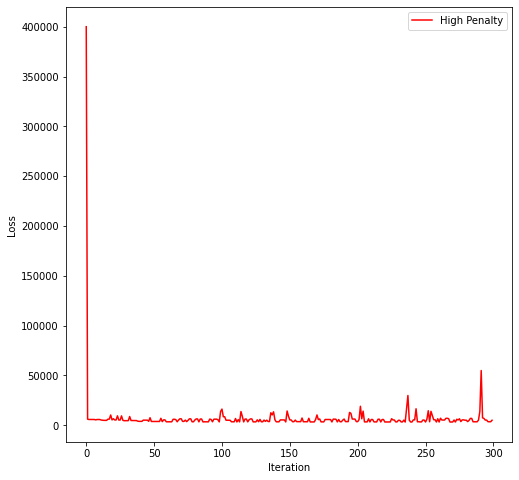

In [13]:
## For Contributing, refer to expectedoutput8.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(loss_list,label="High Penalty",c='r')
plt.legend()
plt.show()

### Visualising the decision boundry over iterations

In [ ]:
## For Contributing, refer to expectedoutput9.html in the expected outputs folder.


### Plotting the decision boundry

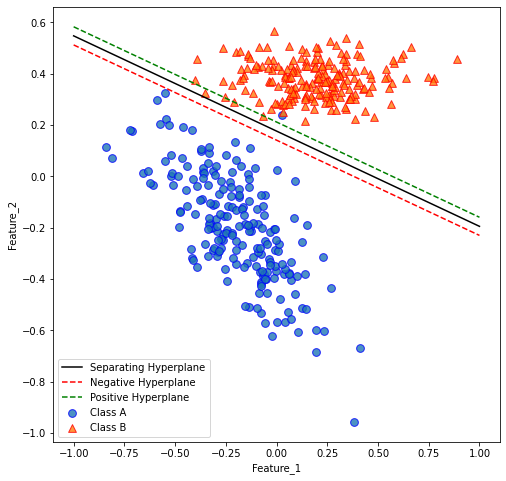

In [14]:
## For Contributing, refer to expectedoutput10.html in the expected outputs folder.

plt.figure(figsize=(8,8))
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.scatter(df_train["Feature_1"][:200],df_train["Feature_2"][:200], label="Class A", edgecolor = "b", s = 60, alpha = 0.8)
plt.scatter(df_train["Feature_1"][200:],df_train["Feature_2"][200:], label="Class B", marker="^", edgecolor = "r", s =60, alpha = 0.8)
xt=np.linspace(-1,1,10)
y= -1 * (b+W[0]*xt)/W[1]
y1= (1-b-W[0]*xt)/W[1]
y2= (-1-b-W[0]*xt)/W[1]
plt.plot(xt,y, c = 'black', label="Separating Hyperplane")
plt.plot(xt,y2,c='r',linestyle="--",label="Negative Hyperplane")
plt.plot(xt,y1,c='g',linestyle="--",label="Positive Hyperplane")
plt.legend()
plt.show()